<a href="https://colab.research.google.com/github/Julianfried/Diplomatura-en-IA-Instituto-Humai/blob/main/Analisis%20de%20Datos/Ejercicio_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/5_Visualizacion/ejercicio/ejercicio.ipynb)

# Ejercicios Visualización

Se pedirá realizar graficos con distintos dataset. Es importante que cada uno de ellos cuente con un título y los respectivos nombres en sus ejes.


## 1. Serie de tiempo

Se pide realizar un análisis exploratorio de una serie de datos macroeconomicos, para ello es necesario visualizar la serie y otros gráficos descriptivos de la misma que se indicarán a continuación.

In [ ]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/data_macro.csv',sep=',')

In [ ]:
df

,Unnamed: 0,Año,Trimestre,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
0,0,2004,I,475.774,76.726,110.908,301.075,52.471
1,1,2004,II,469.984,80.629,114.546,305.247,52.962
2,2,2004,III,493.773,82.344,117.306,317.382,54.495
3,3,2004,IV,500.929,87.173,119.994,324.624,55.747
4,4,2005,I,515.446,89.021,128.989,321.890,57.651
...,...,...,...,...,...,...,...,...
59,59,2018,IV,692.198,176.589,151.873,498.711,94.536
60,60,2019,I,694.243,172.334,155.735,491.686,95.758
61,61,2019,II,689.175,168.489,153.563,491.499,94.743
62,62,2019,III,695.824,166.804,157.587,492.970,94.606


In [ ]:
df.groupby('Año').transform(lambda x: (x.max() - x.min()))

<ipython-input-4-9c48b3b470cd>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.groupby('Año').transform(lambda x: (x.max() - x.min()))


,Unnamed: 0,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
0,3,30.945,10.447,9.086,23.549,3.276
1,3,30.945,10.447,9.086,23.549,3.276
2,3,30.945,10.447,9.086,23.549,3.276
3,3,30.945,10.447,9.086,23.549,3.276
4,3,24.949,9.352,4.180,22.024,3.024
...,...,...,...,...,...,...
59,3,45.644,53.600,21.767,59.112,2.625
60,3,6.945,13.496,8.996,3.924,4.075
61,3,6.945,13.496,8.996,3.924,4.075
62,3,6.945,13.496,8.996,3.924,4.075


### 1.1
Graficar la serie de importaciones, en el eje de las abscisas deben ir los años, mientras que en el de las ordenadas la cantidad importada.

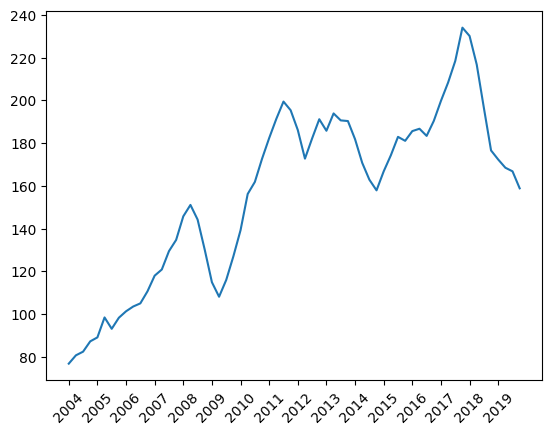

In [ ]:
años = df['Año'].unique()
df['Importaciones_D'].plot();
plt.xticks(range(0, len(años)*4, 4), años, rotation=45);

### 1.2

Graficar los cierres anuales para exportaciones, importaciones, consumo publico, consumo privado y PBI. Recuerde incorporar los años en el eje horizontal.

In [ ]:
df.columns


Index(['Unnamed: 0', 'Año', 'Trimestre', 'PIB_D', 'Importaciones_D',
       'Exportaciones_D', 'Consumo_Privado_D', 'Consumo_Publico_D'],
      dtype='object')

In [ ]:
df['Año'].unique().shape[0]

16

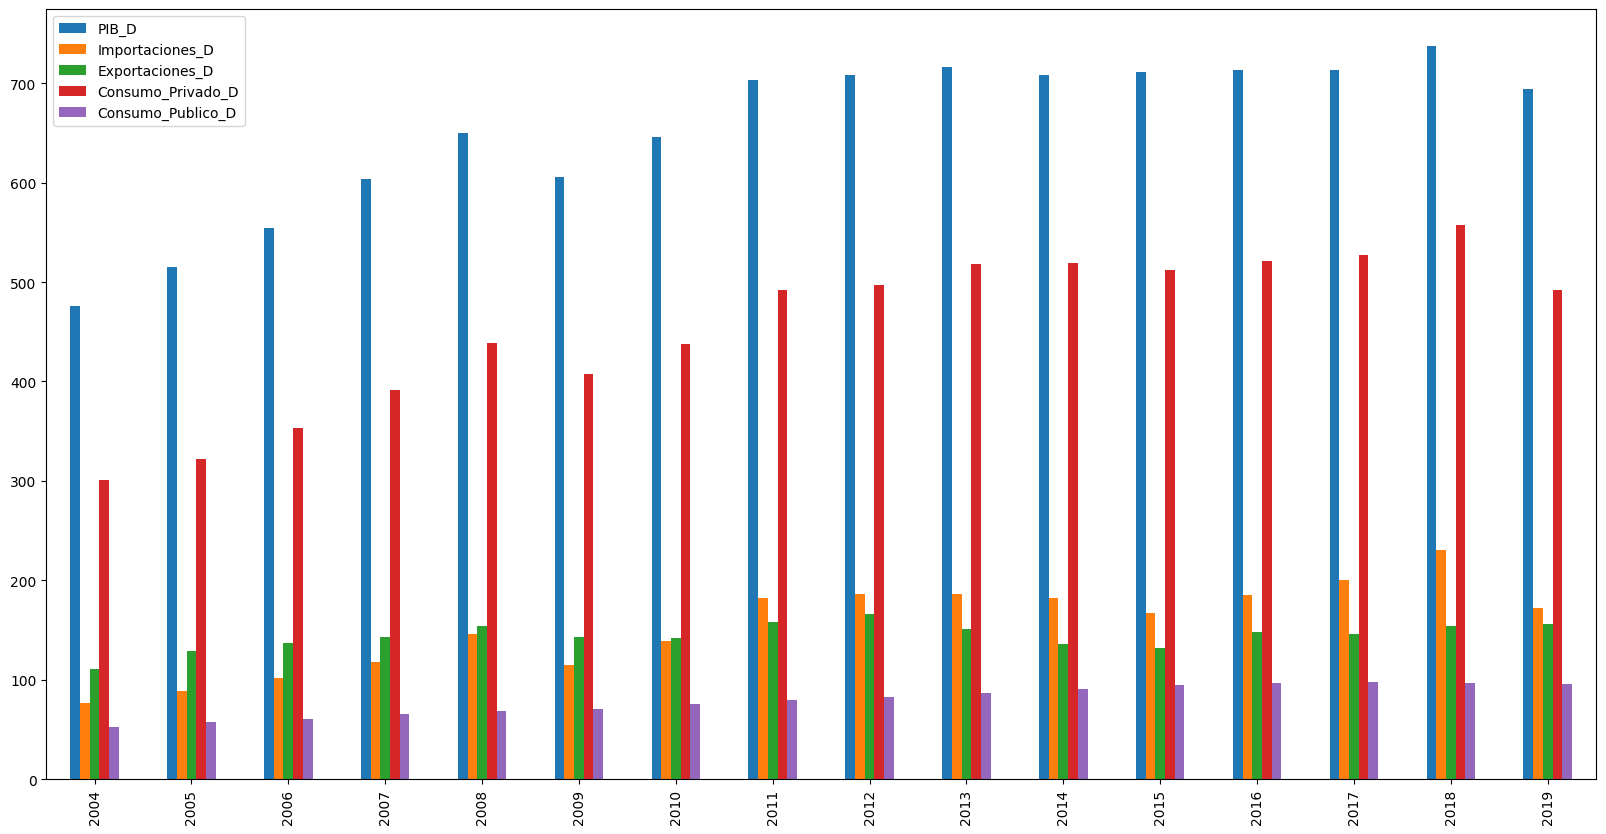

In [ ]:
cols = ['Trimestre', 'PIB_D', 'Importaciones_D', 'Exportaciones_D', 'Consumo_Privado_D', 'Consumo_Publico_D']
df.loc[::4, cols].plot(kind='bar', figsize=(20,10))
labels = df['Año'].unique()
plt.xticks(range(0, labels.shape[0]), labels);

### 1.3 
Graficar la serie de exportaciones junto a su media movil y su desvio estandar móvil.

In [ ]:
import numpy as np

In [ ]:
# Consejo: utilizar las funciones np.rolling

media_movil = df['Exportaciones_D'].rolling(4).mean()
desvio_movil = df['Exportaciones_D'].rolling(4).std()

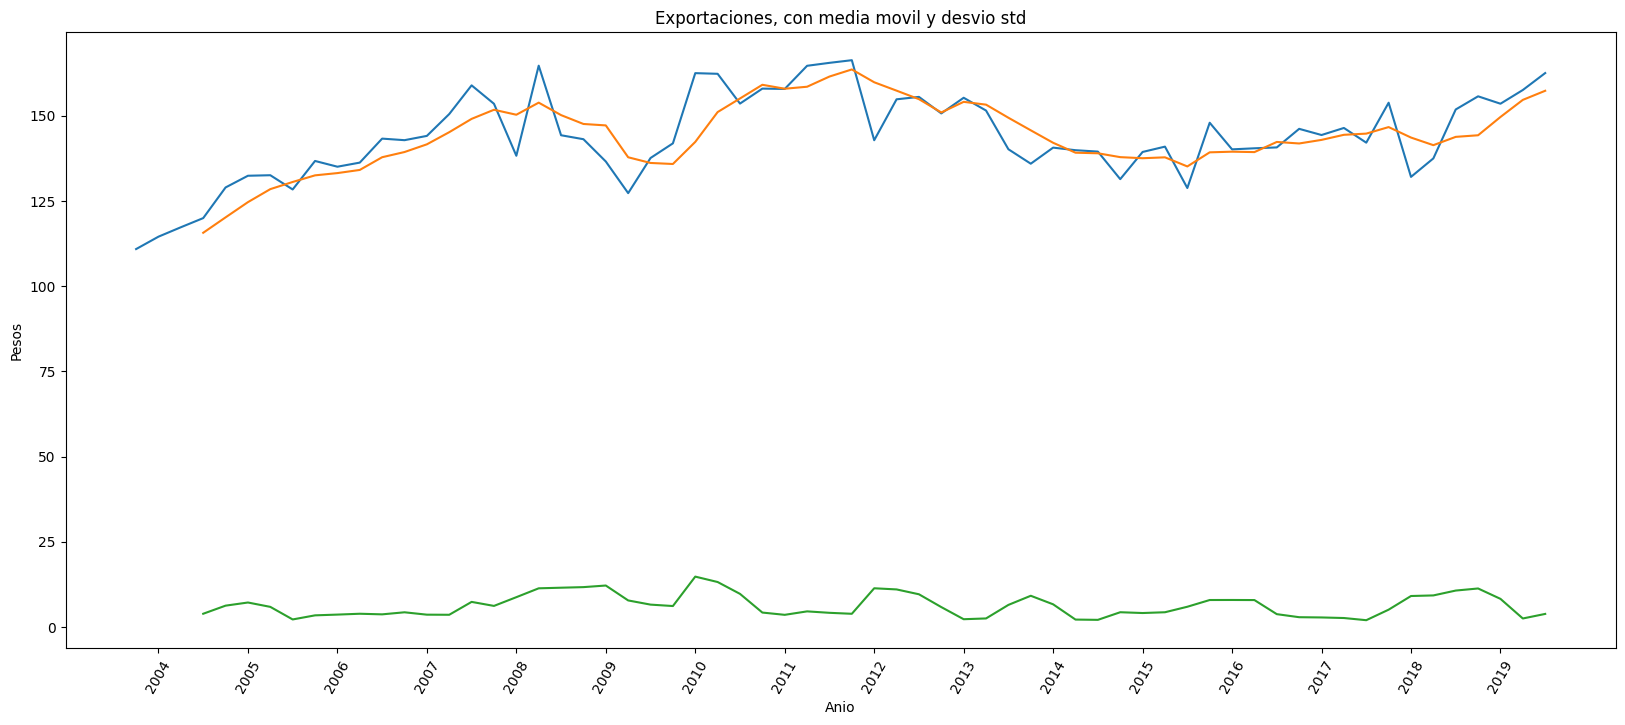

In [30]:
df['Exportaciones_D'].plot(figsize=(20,8))
media_movil.plot();
desvio_movil.plot();
plt.xticks(range(1,65,4), df['Año'].unique(),rotation=60);
plt.xlabel('Anio');
plt.title('Exportaciones, con media movil y desvio std');
plt.ylabel('Pesos');

## 2. Iris Dataset

Utilizando el [Iris Dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris), una base de datos que contiene información acerca de tres especies de flores distintas, vamos realizar algunos gráficos para entender mejor su comportamiento. Este dataset es ampliamente utilizado en el ámbito academico para la práctica de visualización de datos, es recomendable que investiguen y vean los distintos trabajos realizados sobre el mismo. 

In [31]:
df = pd.read_csv("https://datasets-humai.s3.amazonaws.com/datasets/data_iris.csv")

In [32]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2.1 
Graficar las distribución del largo del sepalo.

In [39]:
df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

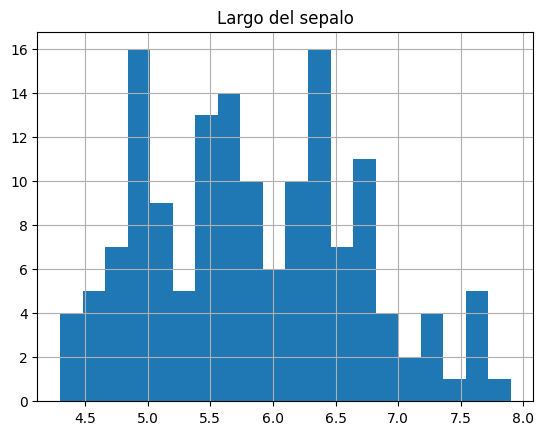

In [41]:
df['SepalLengthCm'].hist(bins=20)
plt.title('Largo del sepalo');

## 2.2
Graficar la función de densidad del largo del sépalo.

<Axes: ylabel='Density'>

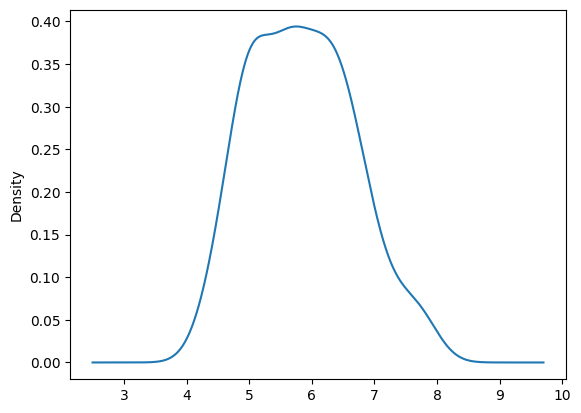

In [42]:
df['SepalLengthCm'].plot.density()

In [43]:
from scipy.stats import kstest
x = df['SepalLengthCm']

norm = (x-x.mean())/x.std()

kstest(norm, 'norm')

KstestResult(statistic=0.08865361377316228, pvalue=0.17813737848592026, statistic_location=-0.8976738791967661, statistic_sign=1)

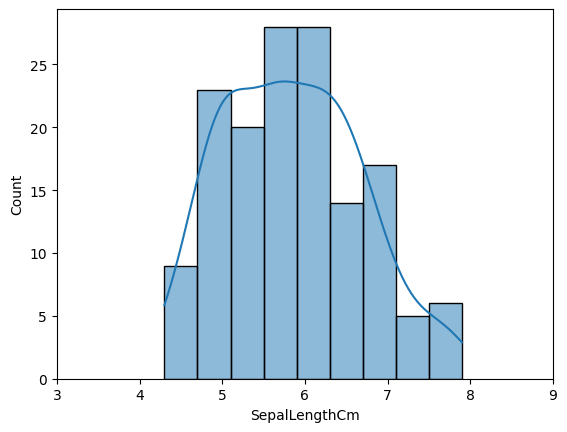

In [44]:
import seaborn as sns
sns.histplot(df['SepalLengthCm'], kde=True)
plt.xlim(3, 9);

## 3. Plotly

In [45]:
import plotly.graph_objects as go
import plotly.express as px

### 3.1

Con plotly express realizar un gráfico de dispersion donde el eje de ordenadas explique el largo del sepalo y el eje de abscisas explique el largo del pétalo con cada una de las especies.

In [47]:
fig = px.scatter(df, x='SepalLengthCm', y='PetalLengthCm', color='Species', title='Iris')

fig.show()

### 3.2

Realizar lo mismo que en el 3.1 pero con un *objeto gráfico* de plotly. Vemos que podemos hacer una mayor personalización.

In [56]:
# Especie versicolor
t1 = go.Scatter(x=df['PetalLengthCm'][df['Species'] == 'Iris-versicolor'],
                    y=df['SepalLengthCm'][df['Species'] == 'Iris-versicolor'],
                    mode='markers',
                    marker_color='rgb( 190,140, 20)', 
                    marker_symbol='star-square',
                    name='versicolor'
                    )

# Especie setosa
t2 = go.Scatter(x=df['PetalLengthCm'][df['Species'] == 'Iris-setosa'],
                    y=df['SepalLengthCm'][df['Species'] == 'Iris-setosa'],
                    mode='markers',
                    marker_color='rgb(140, 190, 20)', 
                    marker_symbol='star-square',
                    name='setosa'
                    )

# Especies virginica
t3 = go.Scatter(x=df['PetalLengthCm'][df['Species'] == 'Iris-virginica'],
                    y=df['SepalLengthCm'][df['Species'] == 'Iris-virginica'],
                    mode='markers',
                    marker_color='rgb(20, 140, 190)', 
                    marker_symbol='star-square',
                    name='virginica'
                    )

In [57]:
fig = go.Figure([t1,t2,t3])
fig.show()